# Моделирование ЦМ. Свойств ЦМ. Стационарные распределения 

In [2]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# документация для ЦМ
# https://quanteconpy.readthedocs.io/en/stable/markov/core.html

Пример 1. Рассмотрим цепочку Маркова, заданную следующей стохастической матрицей

In [49]:
# Пусть задана стохастическая матрица. 
P = np.zeros((6, 6))
P[0, 0] = 1
P[1, 4] = 1
P[2, [2, 3, 4]] = 1/3
P[3, [0, 5]] = 1/2
P[4, [1, 4]] = 1/2
P[5, [0, 3]] = 1/2

In [32]:
PP = np.zeros((3, 3))
PP[0, 1] = 1
PP[1, 2] =1

PP[2, 0] = 1


In [33]:
print(PP)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [50]:
# создание экземляра цепи Маркова
mc1 = qe.MarkovChain(P)


In [29]:
print(mc1)

<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5        0.        ]
 [0.5        0.         0.         0.5        0.         0.        ]]>


In [91]:
mc2=qe.MarkovChain(PP)

Классификация состояний ЦМ
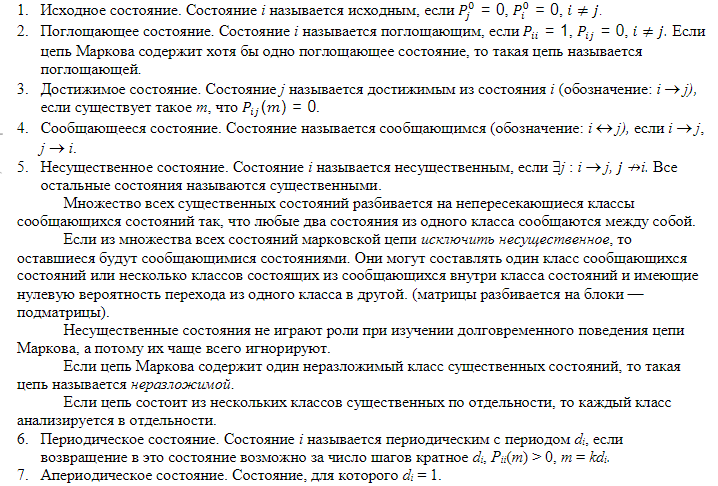

Исследуем матрицу на виды состояний

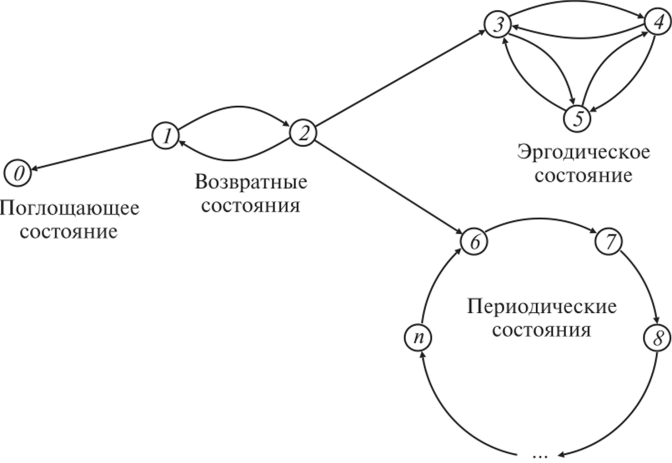

1) Стохастическая матрица  𝑃  is называется неприводимой(неразложимой) если все состояния сообщающиеся, то есть  в конечном итоге мы можем достичь любого состояния из любого другого состояния.


Проверим P. Она разложима.


In [10]:
mc1.is_irreducible

False

Мы также можем определить «сообщающиеся классы».
Состояния этой цепи образуют 4 неразложимых класса

In [39]:
mc1.num_communication_classes

4

In [43]:
# сообщающиеся классы
#  внутри класса все состояния сообщающиеся . Два состояния из различных классов не сообщаются друг с другом.
mc1.communication_classes

[array([0], dtype=int64),
 array([1, 4], dtype=int64),
 array([3, 5], dtype=int64),
 array([2], dtype=int64)]

In [48]:
mc1.recurrent_classes

[array([0], dtype=int64), array([1, 4], dtype=int64)]

Цепь Маркова, задаваемая матрицей переходных вероятностей PP неразложима

In [37]:
mc2.is_irreducible

True

Один неразложимый класс

In [36]:
mc2.num_communication_classes

1

In [38]:
mc2.communication_classes

[array([0, 1, 2])]

2) Стохастическая матрица называется апериодической, если период каждого состояния равен 1, и периодической в противном случае.
Периоди́ческое состоя́ние — это такое состояние цепи Маркова, которое навещается цепью только через промежутки времени, кратные фиксированному числу.

Состояние имеет период k, если при уходе из него для любого возврата в это состояние нужно количество этапов времени, кратное k (k — наибольший общий делитель всех возможных длин путей возврата). Если k = 1, то говорят, что состояние является апериодическим, а вся цепь Маркова является апериодической, если апериодичны все её состояния. В случае неприводимой цепи Маркова можно также упомянуть, что если одно состояние апериодическое, то и все другие тоже являются апериодическими.

То есть Цепь  периодична с периодом например k=2, если  при уходе из любого состояния для возврата в него всегда требуется количество шагов , равное двум.


Пусть дана однородная цепь Маркова с дискретным временем ${\displaystyle \{X_{n}\}_{n\geq 0}}$ с матрицей переходных вероятностей $ {\displaystyle P}$. В частности, для любого ${\displaystyle n\in \mathbb {N} }$ , матрица ${\displaystyle P^{n}=\left(p_{ij}^{(n)}\right)} $  является матрицей переходных вероятностей за ${\displaystyle n} $ шагов. 

Рассмотрим последовательность ${\displaystyle p_{jj}^{(n)},\,n\in \mathbb {N} }$ 


Число

${\displaystyle d(j)=\gcd \left(n\in \mathbb {N} \mid p_{jj}^{(n)}>0\right)}$
где ${\displaystyle \gcd }$ обозначает наибольший общий делитель, называется пери́одом состояния ${\displaystyle j}$.

In [ ]:
2345014523450156

In [51]:
#Эта цепь Маркова является апериодической
# (т. Е. Наименьшее общее кратное периодов повторяющихся подцепей равно единице)

mc1.is_aperiodic

True

In [63]:
mc1.period

1

In [67]:

mc1.simulate(12, init=2)

array([2, 2, 2, 2, 2, 3, 5, 0, 0, 0, 0, 0])

In [58]:
#PP периодическая с периодом 3 
mc2.is_aperiodic

False

In [61]:
mc2.period

3

In [68]:

mc2.simulate(12, init=0)

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
Пример:

In [82]:
P3 = np.zeros((4, 4))
P3[0,[2,3]] = 1/2
P3[1,[2,3]] = 1/2
P3[2,[0,1]] = 1/2
P3[3,[0,1]] = 1/2

print(P3)

[[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]]


In [83]:
mc3 = qe.MarkovChain(P3)


In [86]:
print(mc3)

<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]]>


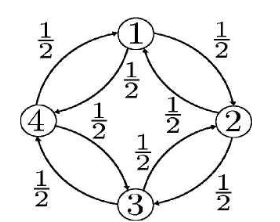

Если выделить два подкласса {1,2} {3,4} (циклические подклассы) , то за один шаг цепь переходит из одного класса состояний в какое либо состояние другого класса.

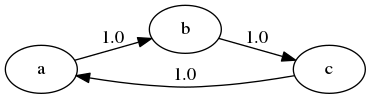

In [119]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

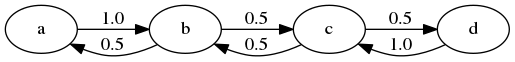

In [ ]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period


In [ ]:
mc.is_aperiodic

# Эргодичность 

ЦМ эргодическая,если не имеет невозвратных состояний если в такой цепи возможны любые переходы их состояния в состояние


!!! Привести пример. Найти функцию проверки эргодичности. 

In [ ]:
# Неприводимость 


Пусть $ P $ стохастическая матрица

два состояния $ x $ и $ y $ говорят  **сообщающиеся ** друг с жругом если 
существуют такие положительные целые числа $ j $ и $ k $ такие что

$$
P^j(x, y) > 0
\quad \text{and} \quad
P^k(y, x) > 0
$$

Это значит:

- состояние $ x $ может быть в конечном итоге достигнуто из состояния $ y $, и
- состояние $ y $ может быть в конечном итоге достигнуто из состояния $ x $

Стохатсическая матрица $ P $ is называется  **неприводимой** если все состояния сообщающиеся; то есть, если $ x $ и $ y $ сообщающиеся для всех
$ (x, y) $ in $ S \times S $.


Например, рассмотрим следующие вероятности перехода для богатства фиктивного набора
домохозяйства

![image.png](attachment:image.png)

Мы можем перевести это в стохастическую матрицу, положив нули где
нет связи между узлами

$$
P :=
\left(
  \begin{array}{ccc}
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
  \end{array}
\right)
$$

Из графика видно, что эта стохастическая матрица неприводима: в конечном итоге мы можем достичь любого состояния из любого другого состояния.

Мы также можем проверить это, используя класс MarkovChain QuantEcon.py

In [121]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

In [123]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False


# Стационарные распределения


Стациона́рное распределе́ние цепи Маркова — это такое распределение вероятности, которое не меняется с течением времени.

Пусть ${\displaystyle \{X_{n}\}_{n\geq 0}}$ — однородная цепь Маркова с дискретным временем, счётным пространством состояний ${\displaystyle \{1,2,\ldots \}}$, и матрицей переходных вероятностей ${\displaystyle P=(p_{ij}),\;i,j=1,2,\ldots }$. 

Тогда дискретное распределение ${\displaystyle \mathbf {q} =(q_{1},q_{2},\ldots )}$ называется стациона́рным (инвариа́нтным), если

${\displaystyle \mathbf {q} P=\mathbf {q} }$

In [ ]:
То есть некоторые распределения инвариантны при изменении шага

In [125]:
P = np.array([[0.4, 0.6],
              [0.2, 0.8]])
ψ = (0.25, 0.75)
y=ψ @ P
y

array([0.25, 0.75])

In [126]:
y @ P

array([0.25, 0.75])

Такие распределения называются стационарными или инвариантными .

Марковская матрица $ P $ может иметь много стационарных распределений.


In [128]:
print(mc1.stationary_distributions)

[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.66666667 0.        ]]


In [131]:
print(mc1.stationary_distributions.dot(mc1.P))

[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.66666667 0.        ]]


In [132]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

Стационарное распределение уникально.

Если цепь Маркова неразложимая, непериодическая, возвратная,то для неё существует стационарное(финальное) распределение вероятностей.

Если для однородной цепи Маркова существуют финальные вероятности, то говорят, что для этой цепи существует стационарный режим функционирования. 


In [101]:
P5 = np.zeros((2, 2))
P5[0,0] = 3/10
P5[0,1] = 7/10
P5[1, 0]= 1
P5[1,1] = 0

print(P5)

[[0.3 0.7]
 [1.  0. ]]


In [103]:
mc5 = qe.MarkovChain(P5)


Данная цепь неразложима и апериодична. Проверьте.

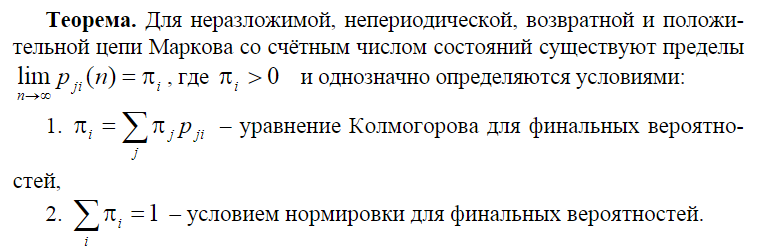

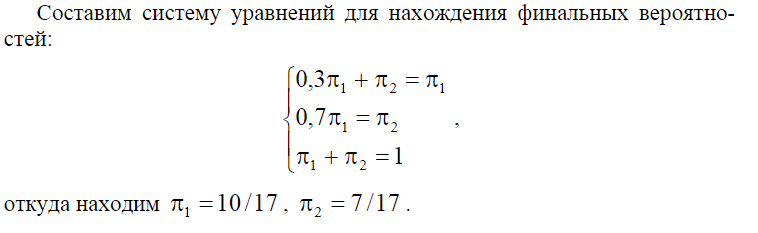

In [105]:
mc5.stationary_distributions

array([[0.58823529, 0.41176471]])

### Сходимость к стационарности



Распределение $ X_t $ ходится к стационарному распределению независимо от начального распределения внроятности.

Сходимость иллюстрируется на следующем рисунке

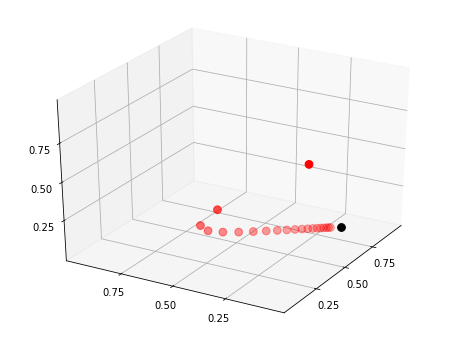

In [134]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))
P = np.array(P)

ψ = (0.2, 0.0, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()

Здесь

- $ P $ стохастическая матрица.  
- - Самая высокая красная точка - это произвольно выбранное начальное распределение вероятностей  

- Другие красные точки - это распределения $ \psi P^t $ для $ t = 1, 2, \ldots $.  
- Черная точка $ \psi^* $.  


Вы можете попробовать поэкспериментировать с различными начальными условиями.


<a id='ergodicity'></a>

# Моделирование цепей Маркова

In [24]:
# Метод генерирует цепь Маркова длиной 50 и любым начальным 
# состоянием 0
mc1.simulate(50, init=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Как видно из матрицы перехода P, если она начинается в состоянии 0, цепочка остается там навсегда, то  0 есть является поглощающим состоянием, состоянием, которое составляет одноэлементный рекуррентный класс.

In [27]:
#Начните с состояния 1:

mc1.simulate(50, init=1)

array([1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4,
       4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4,
       4, 4, 1, 4, 4, 1])

Вы можете заметить, что цепочка остается в рекуррентном классе {1,4} и переходит в состояния  1 и 4 с определенной частотой

Если init не указано, начальное состояние выбирается случайным образом:

In [29]:
mc1.simulate(50)

array([2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
следующее всегда будет давать одинаковую последовательность:

In [32]:
mc1.simulate(50, random_state=12345)

array([2, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 4, 4, 4, 4])

1)Классифицировать состояния ЦМ
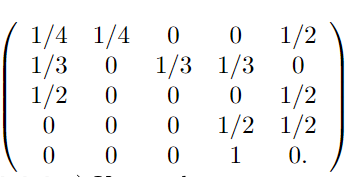

2) Классифицировать состояния ЦМ
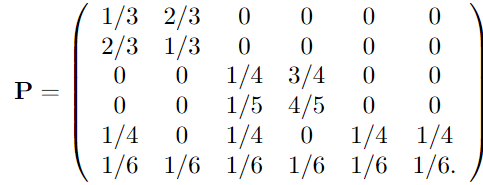

3) 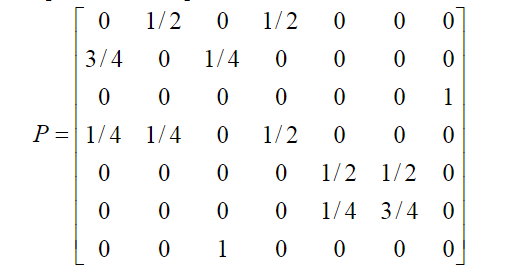

4) Смоделировать и решить задачу.

Имеется два пенсионных фонда, которые будем называть Пф 1 и Пф 2. Работники имеют возможность ежемесячно переводить свои пенсионные накопления из одного фонда в другой, если это им представляется выгодным. Если некоторый работник относится к ПФ 1, то с вероятностью О, 7 он и на следующий месяц останется в этом фонде. Вероятность того, что он решит перевести свои накопления в ПФ2, составляет 0,3. С другой стороны, для тех, кто относится к ПФ 2, вероятность остаться в нем равна 0,6, а вероятность перейти на следующий месяц в ПФ1 равна 0,4.

Предполагается, что эти вероятности постоянны и не меняются из месяца в месяц. Пусть в некоторый месяц, который принимается за начальный, 50% всех работников относятся к фонду 1, а другие 50% -к фонду 2.

Построить матрицу вероятностей переходов. Определите вектор начальных вероятностей. 
а) Требуется определить, какой процент работников будет от носиться к фонду 1, а какой - к фонду 2 через 6 месяцев.

б) Предположим теперь, что первоначально 30% работников относилось к фонду 1, а 70% к фонду. Спрашивается, как изменить это соотношение через 6 месяцев?

Сделайте вывод.

Ответы сверить:
а) [0,5714, 0,4286]. 
b)[0,5712, 0,4288].



5)Рассмотрим состояния банка, характеризующиеся одной из процентных ставок: 12%, 13%, 14%, которые устанавливаются в начале каждого квартала и фиксированы на всем его протяжении. Таким образом,  если за систему S принять действующую процентную ставку, то она в каждый момент времени может находиться только в одном из состояний: s1 – процентная ставка  12%,  s2 – процентная ставка  13%,  s3 – процентная ставка  14%.  Анализ работы банка в предшествующие годы показал, что изменение переходных вероятностей с течением времени пренебрежимо мало. Определить распределение вероятностей состояний системы в конце года, если в конце предыдущего года процентная ставка составила 13%, а граф вероятностей переходов имеетвид
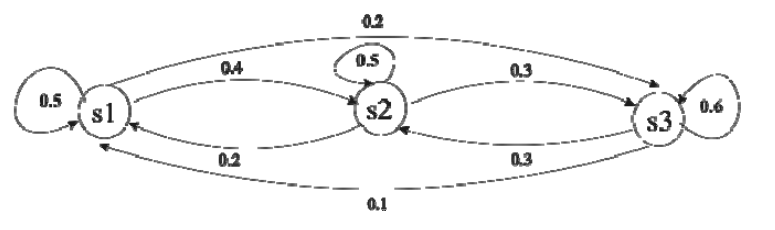



In [ ]:
6) Построить модель задачи из видео о марковских цепях для моделирования посещения магазинов.

7) Визуализировать  графовые моделеи (networkX) для данного блокнота

8) Свойства стохастической матрицы. Даны стохастичесие матрицы. Рассчитать показатели. Решить задачу кластеризации по характеристикам.
